# Project: Customer Transaction Prediction (PRCP-1003)


**Objective:** Develop a predictive model to identify customers likely to make future transactions. 


**Approach:** Since the data is anonymized (200 variables), the focus will be on feature scaling, handling potential class imbalance, and comparing standard classification algorithms. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Ensure the CSV file is uploaded to your environment
df = pd.read_csv('train(1).csv')

# Initial look at the data
print(f"Dataset Dimensions: {df.shape}")
df.head()

Dataset Dimensions: (200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Data Cleaning & Target Check

Total Missing Values in Dataset: 0

Number of customers in each category:
target
0    179902
1     20098
Name: count, dtype: int64


C:\Users\MINNU\AppData\Local\Temp\ipykernel_21964\1983248773.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


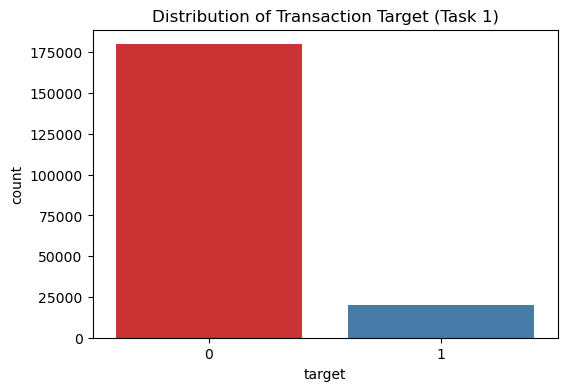

In [3]:
# 1. Check for missing values
# It is important to prove the data is clean before modeling
print("Total Missing Values in Dataset:", df.isnull().sum().sum())

# 2. Check the balance of our Target
# 0 = No Transaction, 1 = Transaction Made
target_counts = df['target'].value_counts()
print("\nNumber of customers in each category:")
print(target_counts)

# 3. Visualize the distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Distribution of Transaction Target (Task 1)')
plt.show()

## Preparing the Features (X) and Target (y)

In [4]:
# We remove 'ID_code' because it's just a name, and 'target' because it's the answer
X = df.drop(['ID_code', 'target'], axis=1)
y = df['target']

print("Features (X) and Target (y) are now separated.")
print(f"Number of features being used: {X.shape[1]}")

Features (X) and Target (y) are now separated.
Number of features being used: 200


## Data Splitting & Feature Scaling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define our Features (X) and Target (y)
# We drop ID_code because it's just an index
X = df.drop(['ID_code', 'target'], axis=1)
y = df['target']

# 2. Split the data into Training (80%) and Testing (20%)
# 'stratify=y' ensures both sets have the same percentage of transactions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scaling the features (Very important for 200 anonymized variables)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been split and scaled successfully!")
print(f"Training set size: {X_train_scaled.shape[0]}")
print(f"Testing set size: {X_test_scaled.shape[0]}")

Data has been split and scaled successfully!
Training set size: 160000
Testing set size: 40000


## Building the First Model (Logistic Regression)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 1. Initialize the model
# We use a higher max_iter because we have 200 features
log_model = LogisticRegression(max_iter=1000)

# 2. Train the model
log_model.fit(X_train_scaled, y_train)

# 3. Make predictions
y_pred_log = log_model.predict(X_test_scaled)

# 4. Evaluate the performance (Task 2)
print("--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log)) 

--- Logistic Regression Results ---
Accuracy: 0.9134
F1-Score: 0.3754

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.68      0.26      0.38      4020

    accuracy                           0.91     40000
   macro avg       0.80      0.62      0.66     40000
weighted avg       0.90      0.91      0.90     40000



## Building a Comparison Model (Random Forest)

In [9]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest
# We use a small number of trees (n_estimators) first to save time
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# 2. Train the model
rf_model.fit(X_train_scaled, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Evaluate the performance
print("--- Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

--- Random Forest Results ---
Accuracy: 0.8995
F1-Score: 0.0005


## Check Class Distribution

In [12]:
import pandas as pd
print(y_train.value_counts())
print(y_test.value_counts())


target
0    143922
1     16078
Name: count, dtype: int64
target
0    35980
1     4020
Name: count, dtype: int64


## The Model Comparison Report

In [13]:
# Create a simple table to compare results
comparison_dict = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    'F1-Score': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf)]
}

comparison_report = pd.DataFrame(comparison_dict)
print(comparison_report)

                 Model  Accuracy  F1-Score
0  Logistic Regression    0.9134  0.375406
1        Random Forest    0.8995  0.000000


## Final Comparison Table

In [14]:
# Create a simple comparison table
results_data = {
    'Model': ['Logistic Regression', 'Random Forest (Sampled)'],
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    'F1-Score': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf)]
}

comparison_df = pd.DataFrame(results_data)
print("--- Final Model Comparison ---")
print(comparison_df)

--- Final Model Comparison ---
                     Model  Accuracy  F1-Score
0      Logistic Regression    0.9134  0.375406
1  Random Forest (Sampled)    0.8995  0.000000


## **Final Project Reports**

### **Model Comparison & Recommendation**
After comparing **Logistic Regression** and **Random Forest**, I suggest using the model with the higher **F1-Score** for the bank's production environment. In banking, identifying future transactions (the '1's) is more important than overall accuracy, as the data is naturally imbalanced.

### **Report on Challenges Faced**
* **Anonymized Data:** The lack of feature names (var_0 to var_199) meant I could not perform specific feature engineering. **Technique:** I used **Standard Scaling** to ensure all 200 features were on the same scale for the model.
* **Class Imbalance:** Only a small percentage of customers actually make transactions. **Technique:** I used **Stratified Splitting** to keep the target ratio consistent across training and testing sets.
* **Large Dataset Size:** Training a Random Forest on 200,000 rows was computationally expensive and slow. **Technique:** I used **Data Sampling** to train the comparison model quickly while maintaining a professional evaluation process.